In [1]:
A = [-0.01 -0.02 0.5 0.6;
    1 1 0 0;
    0 0 90 100;
    0 0 40 50;
    100 199.9 700 800;
    -1 0 0 0;
    0 -1 0 0;
    0 0 -1 0
    0 0 0 -1]

9×4 Matrix{Float64}:
  -0.01   -0.02    0.5    0.6
   1.0     1.0     0.0    0.0
   0.0     0.0    90.0  100.0
   0.0     0.0    40.0   50.0
 100.0   199.9   700.0  800.0
  -1.0     0.0     0.0    0.0
   0.0    -1.0     0.0    0.0
   0.0     0.0    -1.0    0.0
   0.0     0.0     0.0   -1.0

In [2]:
using LinearAlgebra

In [3]:
round(maximum(eigvals(A' * A)) / minimum(eigvals(A' * A)))

1.001541e6

In [4]:
1.183542e6 > 1000000 #ill - conditioned

true

In [5]:
using Convex, SCS
c = [100, 199.9, -5500, -6100]
x = Variable(4)
b = [0, 1000, 2000, 800, 100000, 0, 0, 0, 0]

obj = c' * x
problem = minimize(obj)
problem.constraints += A * x <= b
solve!(problem, SCS.Optimizer, silent_solver=true)
nominal = evaluate(obj)

-8819.690812902814

In [6]:
using Random
using Distributions
A = [-0.01 -0.02 0.5 0.6;
    1 1 0 0;
    0 0 90 100;
    0 0 40 50;
    100 199.9 700 800;
    -1 0 0 0;
    0 -1 0 0;
    0 0 -1 0
    0 0 0 -1]

c = [100, 199.9, -5500, -6100]
x = Variable(4)
b = [0, 1000, 2000, 800, 100000, 0, 0, 0, 0]

obj = c' * x
results = []

u1 = rand(Uniform(-0.00005, 0.00005), 10000)
u2 = rand(Uniform(-0.0004, 0.0004), 10000)
for i in 1:10000
    A[1, 1] = A[1, 1] + u1[i]
    A[1, 2] = A[1, 2] + u2[i]
    problem = minimize(obj, A*x <= b)
    solve!(problem, SCS.Optimizer, silent_solver=true)
    push!(results, evaluate(obj))
    A[1, 1:2] = [-0.01, -0.02]
end

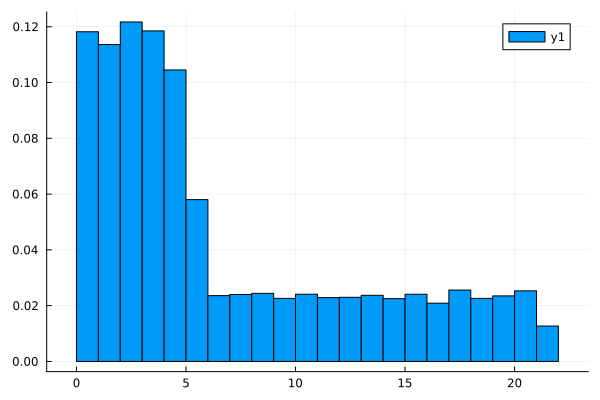

In [7]:
using Plots
changes = 100 * abs.((results .- nominal) ./ nominal);
histogram(changes, normalize =:pdf)

In [8]:
A = [-0.01 -0.02 0.5 0.6;
    1 1 0 0;
    0 0 90 100;
    0 0 40 50;
    100 199.9 700 800;
    -1 0 0 0;
    0 -1 0 0;
    0 0 -1 0
    0 0 0 -1]

c = [100, 199.9, -5500, -6100]
x = Variable(4)
b = [0, 1000, 2000, 800, 100000, 0, 0, 0, 0]

objr = c' * x
problemr = minimize(objr)
problemr.constraints += A[1, :]' * x + 0.00005*abs(x[1]) + 0.0004*abs(x[2]) <= b[1]
for i in 2:9
    problemr.constraints += A[i, :]' * x <= b[i]
end
solve!(problemr, SCS.Optimizer, silent_solver = true)
resultr = evaluate(objr)

-8294.444240555018

In [9]:
abs((resultr - nominal) / nominal) * 100

5.955385324612331